<a href="https://colab.research.google.com/github/ShirleyLiu11/google-cloud-iot-arduino/blob/master/skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pareto chart.csv")
print(df)

                                       skills  ... level
0  long-term strategic thinking and  planning  ...     9
1                              collaboration   ...     8
2                                   influence  ...     7
3                               communication  ...     9
4                             Business acumen  ...     8

[5 rows x 3 columns]


In [ ]:
df.index=df['skills']
df=df.sort_values(by='level',ascending=False)
print(df)

                                                                                skills  ... level
skills                                                                                  ...      
long-term strategic thinking and  planning  long-term strategic thinking and  planning  ...     9
communication                                                            communication  ...     9
collaboration                                                           collaboration   ...     8
Business acumen                                                        Business acumen  ...     8
influence                                                                    influence  ...     7

[5 rows x 3 columns]


In [ ]:
df["levelCumulativePercentage"]=df["level"].cumsum()/df["level"].sum()*100
df["levelCumulativePercentage"]=df["levelCumulativePercentage"].apply(lambda x: round(x,2))
print(df)

                                                                                skills  ... levelCumulativePercentage
skills                                                                                  ...                          
long-term strategic thinking and  planning  long-term strategic thinking and  planning  ...                     21.95
communication                                                            communication  ...                     43.90
collaboration                                                           collaboration   ...                     63.41
Business acumen                                                        Business acumen  ...                     82.93
influence                                                                    influence  ...                    100.00

[5 rows x 5 columns]


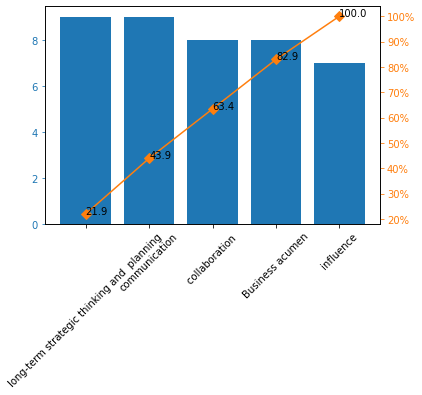

In [ ]:
fig, ax=plt.subplots()
ax.bar(df.index, df["level"], color="C0")
ax.set_xticklabels(df['skills'], rotation=45)
ax2=ax.twinx()
ax2.plot(df.index, df["levelCumulativePercentage"],color="C1", marker="D", ms=7 )
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
for index, v in df.iterrows():
    label = round(v['levelCumulativePercentage'],1)
    plt.annotate(label, xy=(v['skills'],v['levelCumulativePercentage']))

plt.show()